In [64]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation
%matplotlib inline

import numpy as np

from imageio import imread, imsave

# работа над изображениями
from skimage.color import rgb2gray, rgba2rgb
from skimage.feature import canny
from skimage.filters import sobel, gaussian, threshold_local, try_all_threshold, threshold_otsu, threshold_local
from skimage.data import page
from skimage.morphology import binary_opening, binary_closing 
from skimage.measure import regionprops
from scipy import ndimage as ndi
# импортируем функцию label под другим именем, чтобы не терять её, если появляется переменная label
from skimage.measure import label as sk_measure_label
import cv2
import cv


# для работы с путями к файлам
import os

In [2]:
items_path = "./data/items/"
testcases_path = "./data/test_cases/"

## Look at different threshold algorithms and see which ones work best on our items 

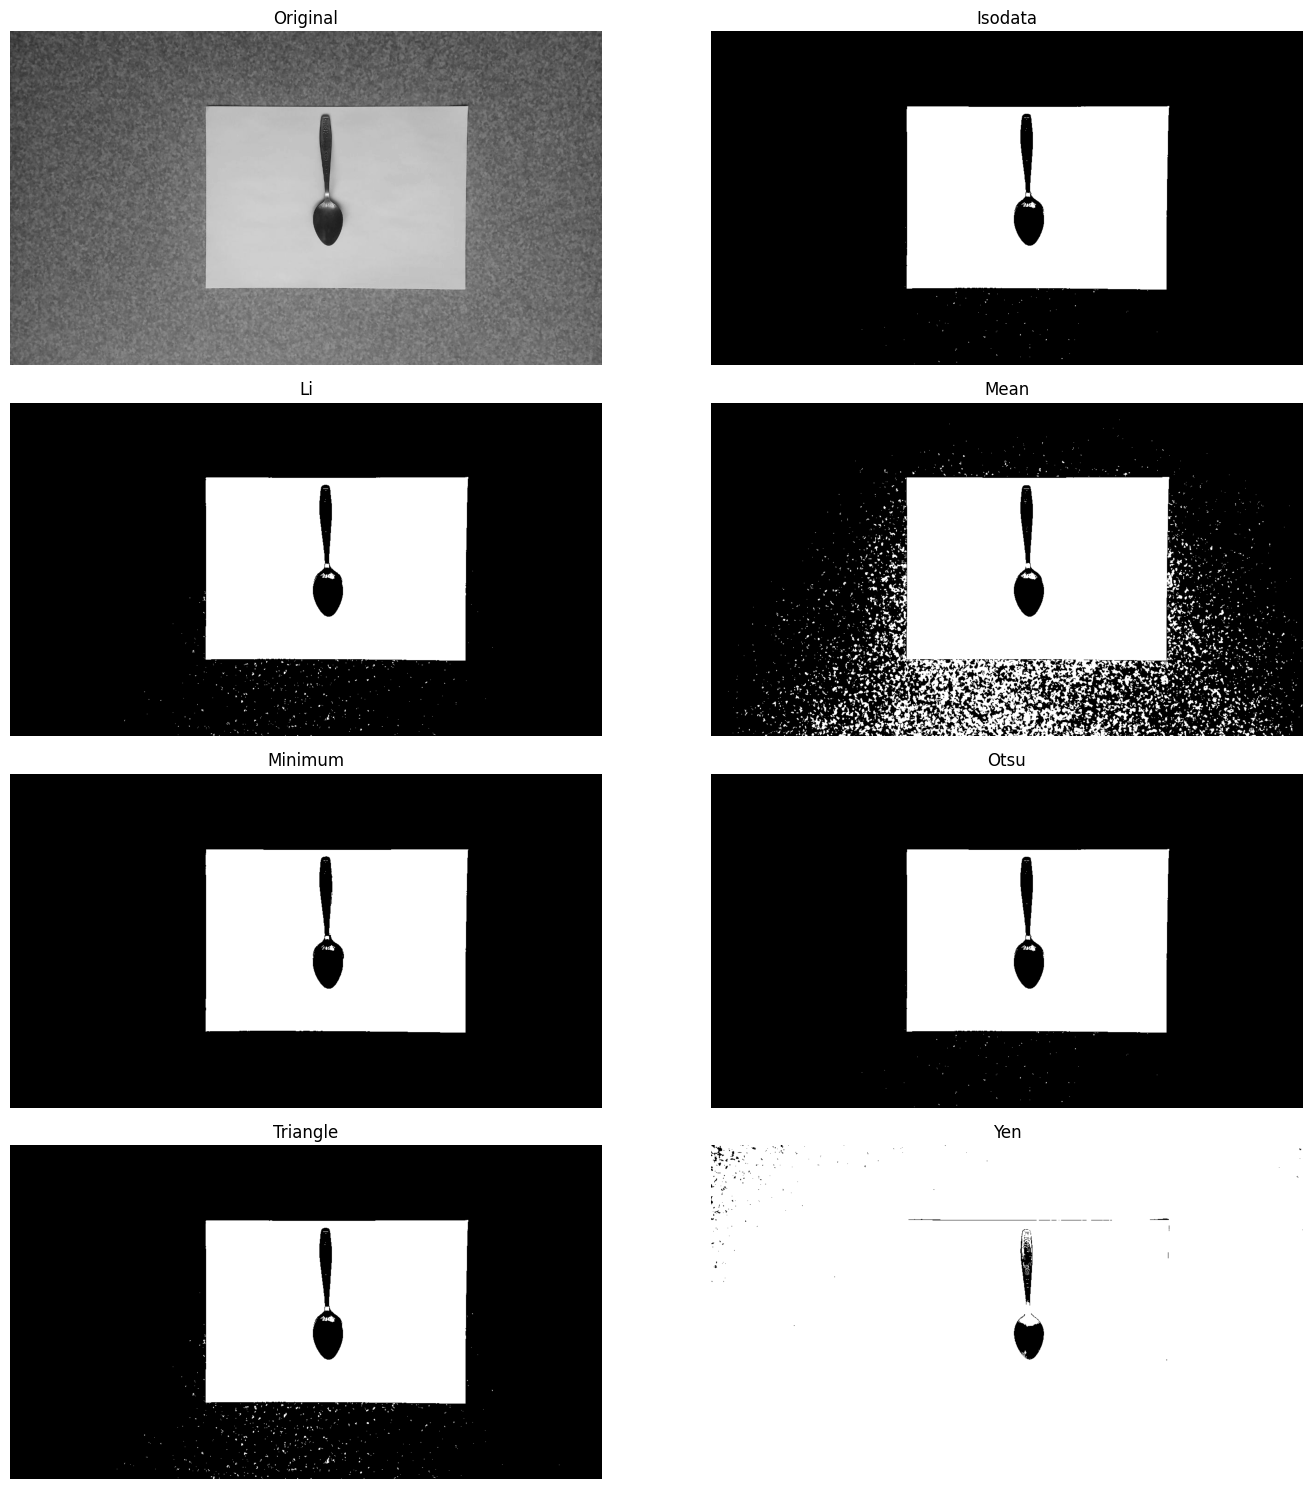

In [11]:
# run for only a couple of items so images dont take too much space
for i in [1, 5, 9]:
    img = imread(os.path.join(items_path, f"{i}.jpg"))
    fig, ax = try_all_threshold(rgb2gray(img), figsize=(15, 15), verbose=False)
    plt.show()

notice that otsu and isodata are good at detecting sheet's edges, while yen can be better when it comes to detecting object's edges

In [56]:
m = res_otsu_enclosed
labels = sk_measure_label(m) # разбиение маски на компоненты связности
props = regionprops(labels) # нахождение свойств каждой области (положение центра, площадь, bbox, интервал интенсивностей и т.д.)
areas = [prop.area for prop in props] # нас интересуют площади компонент связности
threshold_otsu(img_gray_blur)

0.6305712770477396

## Make mask for sheet only

In [23]:
# TODO: move functions to corresponding modules in separate py files
def get_largest_component(mask):
    labels = sk_measure_label(mask) 
    props = regionprops(labels)
    areas = [prop.area for prop in props] 

    largest_comp_id = np.array(areas).argmax() 
    return labels == (largest_comp_id + 1) 

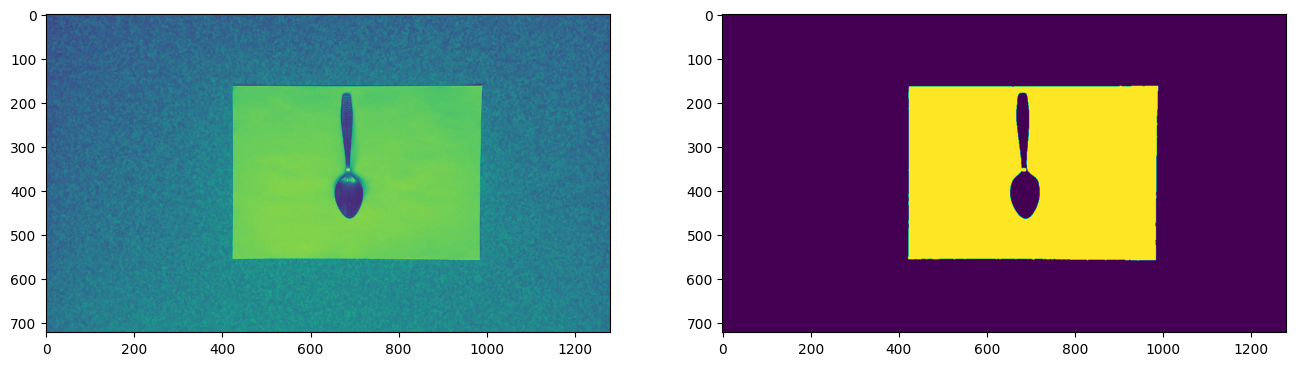

In [112]:
img = imread(os.path.join(items_path, "1.jpg"))

gauss_sigma=1.5
img_gray = rgb2gray(img)
img_gray_blur = gaussian(img_gray, sigma=gauss_sigma)
res_otsu = img_gray_blur >= threshold_otsu(img_gray_blur)

res_otsu_enclosed = binary_closing(res_otsu, footprint=np.ones((2, 2)))
mask = get_largest_component(res_otsu_enclosed)

## fill pixels inside sheet
#mask = ndi.binary_fill_holes(mask)

## for displaying image itself and not mask
# img_sheet_only = cv2.bitwise_and(img, img, mask=mask.astype("uint8"))


fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(img_gray)
ax[1].imshow(mask)
plt.show()

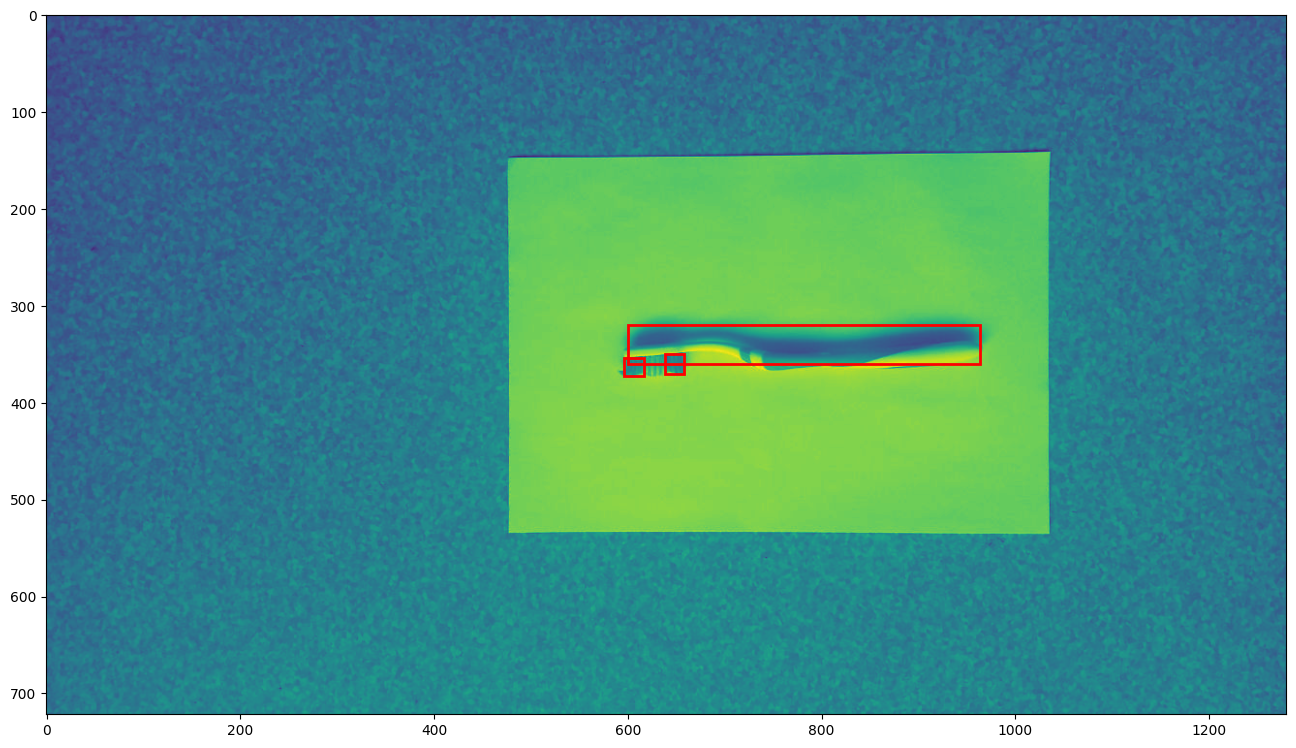

In [115]:
img = imread(os.path.join(items_path, "7.jpg"))

gauss_sigma=1.5
img_gray = rgb2gray(img)
img_gray_blur = gaussian(img_gray, sigma=gauss_sigma)
res_otsu = img_gray_blur >= threshold_otsu(img_gray_blur)

res_otsu_enclosed = binary_closing(res_otsu, footprint=np.ones((2, 2)))

labels = sk_measure_label(1 - res_otsu_enclosed) 
props = regionprops(labels)
bboxes = [prop.bbox for prop in props] 


fig, ax = plt.subplots(figsize=(16, 10))
ax.imshow(img_gray)

for bbox in bboxes:
    minr, minc, maxr, maxc = bbox
    if (maxc - minc) * (maxr - minr) > 0.95 * img.shape[0] * img.shape[1]: # skip bound box for whole image
        continue 
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()

for some images more than one component is detected - mb local thresholding can help...

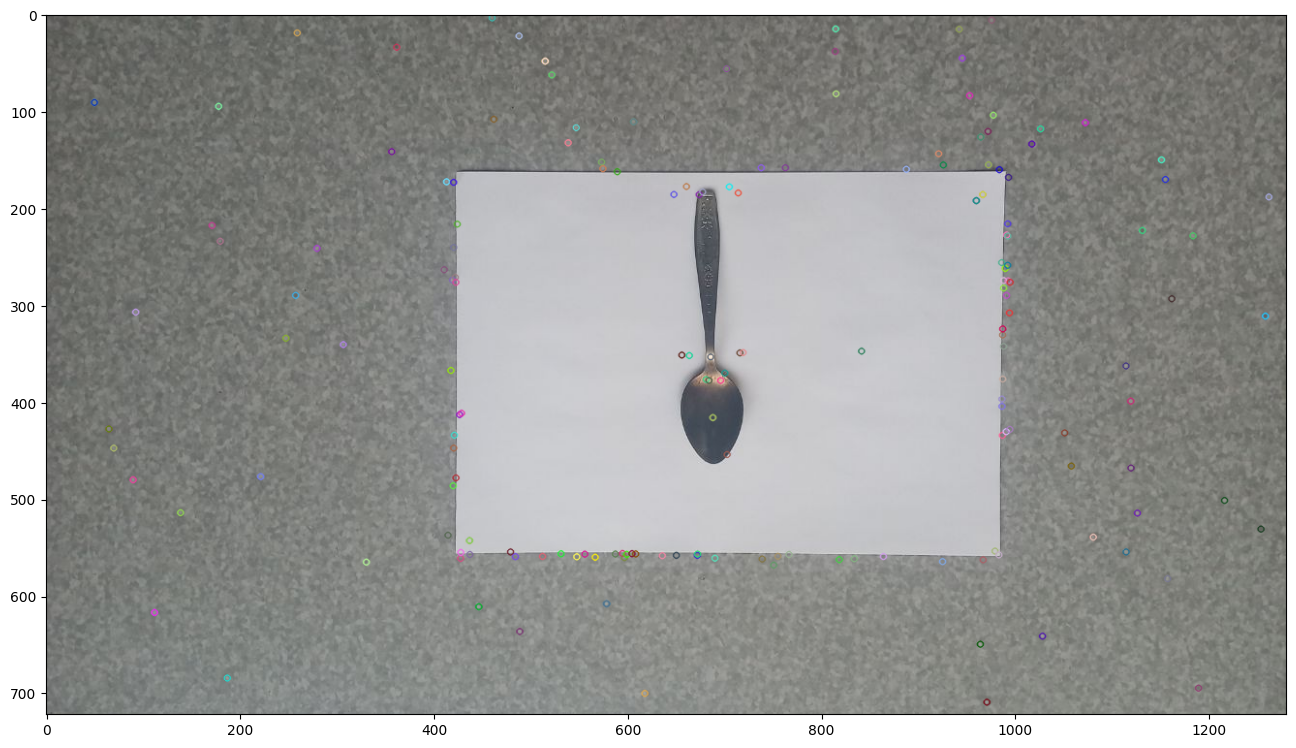

In [122]:
img = imread(os.path.join(items_path, "1.jpg"))

sift = cv2.SIFT_create()
kp = sift.detect(img,None)
img_sift = cv2.drawKeypoints(img,kp,img)

fig, ax = plt.subplots(1,figsize=(16, 10))
ax.imshow(img_sift)

we can see that not too many keypoints describing item were found